# EDA ON TWEETS
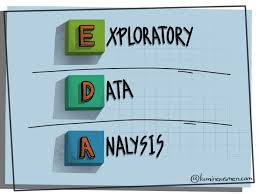
<!-- <img src="https://miro.medium.com/max/3200/0*4x5HPrOlbSE0kXzz" width="500"> -->

# Work Flow
<img src="https://www.mdpi.com/ijgi/ijgi-06-00368/article_deploy/html/images/ijgi-06-00368-g001.png" width="500">

# Version History
* **Version 1 ---------------------------------------------------------------  22-08-2020**
* * Loading Libraries
* * Loading Data
* * Looking for text and target data only
* * Target Counts
* * Calculating and analyzing Char length of each text
* * Calculating and analyzing No. of words in each text
* * Extracting urls from the text
* **Version 2 ---------------------------------------------------------------- 22-08-2020**
* * *Modifying Some Results*
* **Version 3 ---------------------------------------------------------------- 22-08-2020**
* * *Modifying Some Results*
* **Version 4 --------------------------------------------------------------- *In Progress***

# Loading Libraries

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
plt.style.use('ggplot')

# Loading Data

In [ ]:
train_path = "../input/nlp-getting-started/train.csv"
test_path = "../input/nlp-getting-started/test.csv"
sample_submission_path = "../input/nlp-getting-started/sample_submission.csv"

In [ ]:
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)
submission = pd.read_csv(sample_submission_path)

In [ ]:
df_train.head()

In [ ]:
df_train.info()

In [ ]:
print(df_train.info())


In [ ]:
df_test.info()

# Looking for text and target data only

In [ ]:
df_train = df_train[['text','target']]
df_test = df_test[['text']]

# Target Counts

In [ ]:
y = np.array(df_train.target.value_counts())
sns.barplot(x = [0,1],y = y,palette='gnuplot2_r')
difference = y[0]-y[1]
print("Difference between target 0 and 1: ",y[0]-y[1])

In [ ]:
df_train.text.describe()

# Calculating and analyzing Char length of each text

In [ ]:
df_train['Char_length'] = df_train['text'].apply(len)

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(14, 4), sharex=True)
f.suptitle("Histogram of char length of text",fontsize=20)
sns.distplot(df_train[df_train['target']==0].Char_length,kde=True,bins=20,hist=True,ax=axes[0],label="Histogram of 20 bins of label 0",
            kde_kws={"color": "r", "lw": 2, "label": "KDE 0"},
                           hist_kws={ "linewidth": 2,
                                     "alpha": 1, "color": "y"})
axes[0].legend(loc="best")
sns.distplot(df_train[df_train['target']==1].Char_length,kde=True,bins=20,hist=True,ax=axes[1],label="Histogram of 20 bins of label 1",
            kde_kws={"color": "g", "lw": 2, "label": "KDE 1"},
                           hist_kws={ "linewidth": 2,
                                     "alpha": 1, "color": "pink"})
axes[1].legend(loc="best")

plt.figure(figsize=(14,4))
sns.distplot(df_train[df_train['target']==0].Char_length,kde=True,bins=20,hist=True,label="Histogram of 20 bins of label 0",
            kde_kws={"color": "r", "lw": 2,"label": "KDE 0"},
                           hist_kws={ "linewidth": 2,
                                     "alpha": 1, "color": "y"})

sns.distplot(df_train[df_train['target']==1].Char_length,kde=True,bins=20,hist=True,label="Histogram of 20 bins of label 1",
            kde_kws={"color": "g", "lw": 2,"label": "KDE 1"},
                           hist_kws={ "linewidth": 2,
                                     "alpha": 1, "color": "pink"})
plt.legend(loc="best")

### Text length almost same for both targets

# Calculating and analyzing No. of words in each text

In [ ]:
def word_count(sent):
    return len(sent.split())
df_train['word_count'] = df_train.text.apply(word_count)

In [ ]:
df_train.head()

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(14, 4), sharex=True)
f.suptitle("Histogram of char length of text",fontsize=20)
sns.distplot(df_train[df_train['target']==0].word_count,kde=True,bins=20,hist=True,ax=axes[0],label="Histogram of label 0",
            kde_kws={"color": "r", "lw": 2, "label": "KDE 0"},
                           hist_kws={ "linewidth": 2,
                                     "alpha": 1, "color": "y"})
axes[0].legend(loc="best")
sns.distplot(df_train[df_train['target']==1].word_count,kde=True,bins=20,hist=True,ax=axes[1],label="Histogram of label 1",
            kde_kws={"color": "g", "lw": 2, "label": "KDE 1"},
                           hist_kws={ "linewidth": 2,
                                     "alpha": 1, "color": "pink"})
axes[1].legend(loc="best")

plt.figure(figsize=(14,4))
sns.distplot(df_train[df_train['target']==0].word_count,kde=True,bins=20,hist=True,label="Histogram of 20 bins of label 0",
            kde_kws={"color": "r", "lw": 2,"label": "KDE 0"},
                           hist_kws={ "linewidth": 2,
                                     "alpha": 1, "color": "y"})

sns.distplot(df_train[df_train['target']==1].word_count,kde=True,bins=20,hist=True,label="Histogram of 20 bins of label 1",
            kde_kws={"color": "g", "lw": 2,"label": "KDE 1"},
                           hist_kws={ "linewidth": 2,
                                     "alpha": 1, "color": "pink"})
plt.legend(loc="best")

### Looks almost same for both targets

# Extracting urls from the text

In [ ]:
def urls(sent):
    return re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',sent)
def url_counts(sent):
    return len(re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',sent))
def remove_urls(sent):
    return re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','',sent)
    

In [ ]:
s ='hello this is the work - https://www.helloworld.com, https://www.worldhello.com'
print(urls(s))
print(url_counts(s))
print(remove_urls(remove_urls(s)))

In [ ]:
%%time

df_train['url_count'] = df_train.text.apply(url_counts)
df_train['urls'] = df_train.text.apply(urls)

In [ ]:
# An overview of dataframe after above transformations
df_train.head()

In [ ]:
sum(df_train.url_count)

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(14, 4), sharex=True)
f.suptitle("Histogram of char length of text",fontsize=20)
sns.distplot(df_train[df_train['target']==0].url_count,kde=False,bins=10,hist=True,ax=axes[0],label="Histogram of label 0",
                           hist_kws={ "linewidth": 2,
                                     "alpha": 1, "color": "y"})
axes[0].legend(loc="best")
sns.distplot(df_train[df_train['target']==1].url_count,kde=False,bins=10,hist=True,ax=axes[1],label="Histogram of label 1",
                           hist_kws={ "linewidth": 2,
                                     "alpha": 1, "color": "pink"})
axes[1].legend(loc="best")

plt.figure(figsize=(14,4))
sns.distplot(df_train[df_train['target']==0].url_count,kde=False,bins=10,hist=True,label="Histogram of 10 bins of label 0",
                           hist_kws={ "linewidth": 2,
                                     "alpha": 1, "color": "y"})

sns.distplot(df_train[df_train['target']==1].url_count,kde=False,bins=10,hist=True,label="Histogram of 10 bins of label 1",
                           hist_kws={ "linewidth": 2,
                                     "alpha": 1, "color": "pink"})
plt.legend(loc="best")

### Looks more url counts in disaster Tweets

## Now removing urls link from text

In [ ]:
df_train['text'] = df_train.text.apply(remove_urls)